In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report

In [2]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
label_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

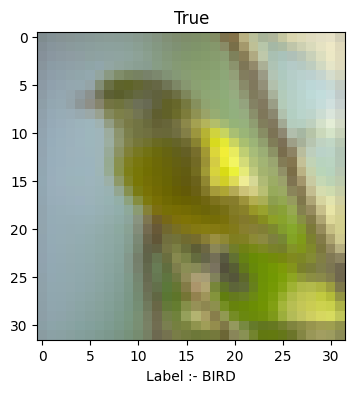

In [5]:
def plt_image(X,y,sample,title):
  plt.figure(figsize = (15,4))
  plt.imshow(X[sample])
  plt.xlabel(f"Label :- {label_class[y.reshape(-1)[sample]].upper()}") if "True".lower() in title.lower() else plt.xlabel(f"Label :- {label_class[y[sample]].upper()}")
  plt.title(f"{title}")
  plt.show()
  return None

plt_image(X_train,y_train,540,title="True")

# Using a FeedForward ANN

In [6]:
ann_model = models.Sequential([
    layers.Input(shape=(32,32,3)),
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='SGD',
                   loss='sparse_categorical_crossentropy', # as Y_labels are not in one-hot encoded form
                   metrics=['accuracy'])

ann_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3104 - loss: 1.9163
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4193 - loss: 1.6429
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4518 - loss: 1.5495
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4755 - loss: 1.4869
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4947 - loss: 1.4362
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5101 - loss: 1.3880
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5261 - loss: 1.3488
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5358 - loss: 1.3203
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5526 - loss: 1.2803
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5658 - loss: 1.2456
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5727 - loss: 1.2196
Epoch 12/50
1563/1563 ━━━━━━━━

In [7]:
ann_model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5644 - loss: 1.5286


[1.530722975730896, 0.5648999810218811]

In [8]:
y_pred = ann_model.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred] # Index of the Max. value in the element

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [9]:
print("Classification Report for ANN Network: \n", classification_report(y_test.reshape(-1), y_pred_class)) # For ensuring the same dimensions for both the arrays

Classification Report for ANN Network: 
               precision    recall  f1-score   support

           0       0.57      0.72      0.63      1000
           1       0.71      0.65      0.68      1000
           2       0.42      0.55      0.48      1000
           3       0.41      0.33      0.36      1000
           4       0.48      0.54      0.51      1000
           5       0.45      0.54      0.49      1000
           6       0.66      0.58      0.62      1000
           7       0.75      0.53      0.62      1000
           8       0.77      0.57      0.65      1000
           9       0.63      0.64      0.64      1000

    accuracy                           0.56     10000
   macro avg       0.58      0.56      0.57     10000
weighted avg       0.58      0.56      0.57     10000



### Testing

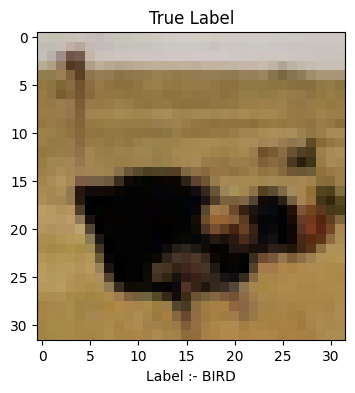

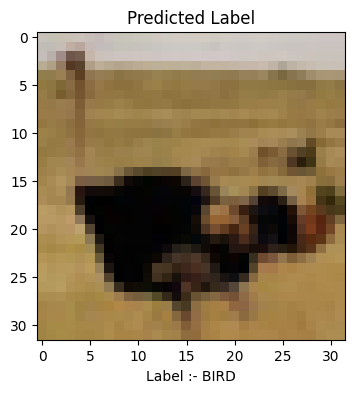

In [10]:
plt_image(X_test,y_test,450,title="True Label")
plt_image(X_test,y_pred_class,450,title="Predicted Label")

# Using CNN model

## Decreasing the filter number with the flow

In [11]:
cnn_model_decrease = models.Sequential([
    # Feature Extraction
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Dense Layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model_decrease.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model_decrease.fit(X_train, y_train, epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3754 - loss: 1.7056
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5892 - loss: 1.1708
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6447 - loss: 1.0151
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6711 - loss: 0.9366
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6975 - loss: 0.8677
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7190 - loss: 0.8036
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7364 - loss: 0.7553
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7492 - loss: 0.7242
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7586 - loss: 0.6851
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7693 - loss: 0.6516
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7820 - loss: 0.6188
Epoch 12/50
1563/1563 ━━━━━━━

In [12]:
cnn_model_decrease.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6794 - loss: 2.5269


[2.558577060699463, 0.6671000123023987]

In [13]:
y_pred = cnn_model_decrease.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]

print("Classification Report for CNN Increase Network: \n", classification_report(y_test.reshape(-1), y_pred_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report for CNN Increase Network: 
               precision    recall  f1-score   support

           0       0.72      0.66      0.69      1000
           1       0.81      0.77      0.79      1000
           2       0.58      0.52      0.55      1000
           3       0.43      0.57      0.49      1000
           4       0.60      0.63      0.62      1000
           5       0.60      0.52      0.56      1000
           6       0.77      0.74      0.76      1000
           7       0.76      0.65      0.70      1000
           8       0.76      0.79      0.77      1000
           9       0.73      0.80      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



### Testing

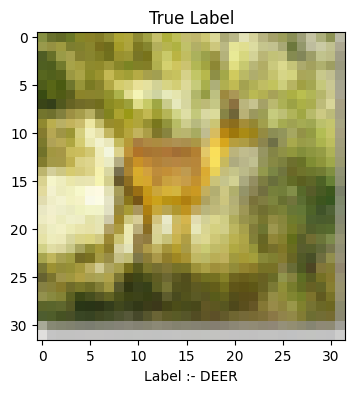

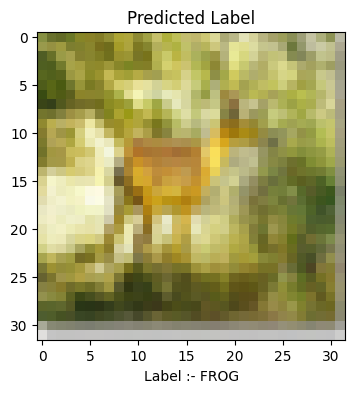

In [14]:
plt_image(X_test,y_test,500,title="True Label")
plt_image(X_test,y_pred_class,500,title="Predicted Label")

## Increasing the filter number with the flow

In [15]:
cnn_model_increase = models.Sequential([
    # Feature Extraction
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Dense Layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model_increase.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model_increase.fit(X_train, y_train, epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3758 - loss: 1.7180
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5997 - loss: 1.1323
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6555 - loss: 0.9881
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6928 - loss: 0.8824
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7166 - loss: 0.8155
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7320 - loss: 0.7627
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7579 - loss: 0.7031
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7706 - loss: 0.6638
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7839 - loss: 0.6260
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7971 - loss: 0.5817
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8118 - loss: 0.5457
Epoch 12/50
1563/1563 ━━━━━━━

In [16]:
cnn_model_decrease.evaluate(X_test,y_test)

y_pred = cnn_model_decrease.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]

print("Classification Report for CNN Decrease Network: \n", classification_report(y_test.reshape(-1), y_pred_class))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6794 - loss: 2.5269
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report for CNN Decrease Network: 
               precision    recall  f1-score   support

           0       0.72      0.66      0.69      1000
           1       0.81      0.77      0.79      1000
           2       0.58      0.52      0.55      1000
           3       0.43      0.57      0.49      1000
           4       0.60      0.63      0.62      1000
           5       0.60      0.52      0.56      1000
           6       0.77      0.74      0.76      1000
           7       0.76      0.65      0.70      1000
           8       0.76      0.79      0.77      1000
           9       0.73      0.80      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



### Testing

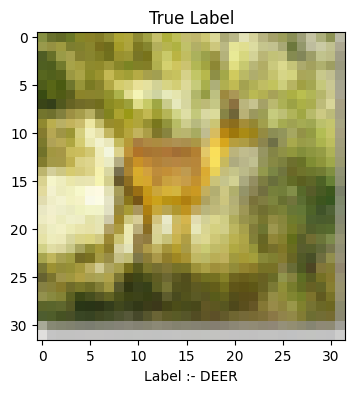

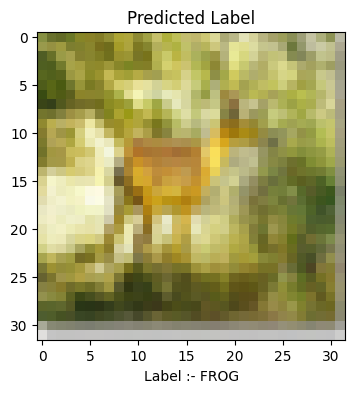

In [17]:
plt_image(X_test,y_test,500,title="True Label")
plt_image(X_test,y_pred_class,500,title="Predicted Label")